In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 71.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=4562ef5df607dcbc9b8d419fdceff3dfcfba3ce731c5c5855d694c78cedbde87
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets

from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
import pickle

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# embeddings_balanced_b_path = 'drive/MyDrive/DataBank/wordEmbedding/multiclass/balanced/em_2.csv'
# embeddings_balanced_b_path_im = 'drive/MyDrive/DataBank/wordEmbedding/multiclass/imbalanced/em_2.csv'

embeddings_balanced_b_path = 'drive/MyDrive/ThesisData/augmented_data/wordEmbedding/multiclass/balanced/em_2.csv'
embeddings_balanced_b_path_im = 'drive/MyDrive/ThesisData/augmented_data/wordEmbedding/multiclass/imbalanced/em_2.csv'

In [ ]:
plt_data_balanced = []
plt_data_imbalanced = []
plt_ROC_balanced = []
plt_ROC_imbalanced = []

In [ ]:
import sys
import numpy as np

def predictive_entropy(predictions):
    epsilon = sys.float_info.min
    predictive_entropy = -np.sum( np.mean(predictions, axis=0) * np.log(np.mean(predictions, axis=0) + epsilon),
            axis=-1)

    return predictive_entropy

#Balanced Dataset

#UNI - Directional

Adam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.4414188861846924. Accuracy: 50.36649% F1-macro: 48.87% F1-weighted: 49.00% cohen_kappa: 0.34%
Iteration: 2000. Loss: 1.3012545108795166. Accuracy: 53.56021% F1-macro: 53.20% F1-weighted: 53.25% cohen_kappa: 0.38%
Iteration: 3000. Loss: 1.0900580883026123. Accuracy: 57.27749% F1-macro: 57.24% F1-weighted: 57.31% cohen_kappa: 0.43%
Iteration: 4000. Loss: 0.8584461212158203. Accuracy: 59.00524% F1-macro: 58.69% F1-weighted: 58.75% cohen_kappa: 0.45%
Iteration: 5000. Loss: 0.9086729288101196. Accuracy: 62.09424% F1-macro: 62.02% F1-weighted: 62.08% cohen_kappa: 0.49%
Iteration: 6000. Loss: 0.9329371452331543. Accuracy: 61.41361% F1-macro: 60.94% F1-weighted: 61.00% cohen_kappa: 0.48%
Iteration: 7000. Loss: 1.1444915533065796. Accuracy: 65.34031% F1-macro: 65.33% F1-weighted: 65.40% cohen_kappa: 0.54%
Iteration: 8000. Loss: 1.0542149543762207. Accuracy: 65.39267% F1-macro: 64.73% F1-weighted: 64.80% cohen_kappa: 0.54%
Iteration: 9000. Loss:

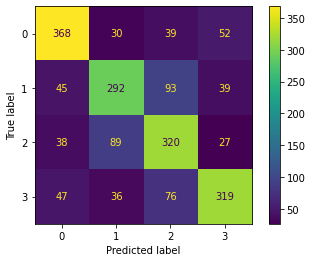

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape

col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)

sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_UNI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM

        # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional
        self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0))
        #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits

'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)

'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
predictions = []


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())
                # print(outputs)

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('LSTM-UNI',iter,'Adam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.143432855606079. Accuracy: 48.69110% F1-macro: 48.28% F1-weighted: 48.35% cohen_kappa: 0.32%
Iteration: 2000. Loss: 1.1787909269332886. Accuracy: 54.81675% F1-macro: 54.76% F1-weighted: 54.83% cohen_kappa: 0.40%
Iteration: 3000. Loss: 1.2219078540802002. Accuracy: 56.28272% F1-macro: 56.33% F1-weighted: 56.40% cohen_kappa: 0.42%
Iteration: 4000. Loss: 1.0568090677261353. Accuracy: 60.00000% F1-macro: 59.89% F1-weighted: 59.96% cohen_kappa: 0.47%
Iteration: 5000. Loss: 1.0412423610687256. Accuracy: 60.57592% F1-macro: 60.77% F1-weighted: 60.83% cohen_kappa: 0.47%
Iteration: 6000. Loss: 0.8947547674179077. Accuracy: 62.98429% F1-macro: 62.84% F1-weighted: 62.91% cohen_kappa: 0.51%
Iteration: 7000. Loss: 0.9826174974441528. Accuracy: 66.12565% F1-macro: 66.18% F1-weighted: 66.24% cohen_kappa: 0.55%
Iteration: 8000. Loss: 1.0853607654571533. Accuracy: 67.22513% F1-macro: 66.95% F1-weighted: 67.01% cohen_kappa: 0.56%
Iteration: 9000. Loss: 

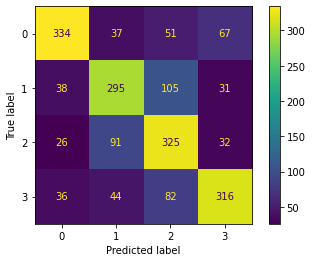

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_UNI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM

        # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional
        self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits

'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('LSTM-UNI',iter,'NAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.310558557510376. Accuracy: 49.58115% F1-macro: 48.55% F1-weighted: 48.68% cohen_kappa: 0.33%
Iteration: 2000. Loss: 0.9186166524887085. Accuracy: 53.29843% F1-macro: 53.21% F1-weighted: 53.28% cohen_kappa: 0.38%
Iteration: 3000. Loss: 1.471555233001709. Accuracy: 52.61780% F1-macro: 51.11% F1-weighted: 51.22% cohen_kappa: 0.37%
Iteration: 4000. Loss: 1.1563504934310913. Accuracy: 55.18325% F1-macro: 53.61% F1-weighted: 53.70% cohen_kappa: 0.40%
Iteration: 5000. Loss: 1.2908828258514404. Accuracy: 58.53403% F1-macro: 58.74% F1-weighted: 58.78% cohen_kappa: 0.45%
Iteration: 6000. Loss: 0.9436841011047363. Accuracy: 59.73822% F1-macro: 59.38% F1-weighted: 59.49% cohen_kappa: 0.46%
Iteration: 7000. Loss: 0.8853064775466919. Accuracy: 64.34555% F1-macro: 64.25% F1-weighted: 64.32% cohen_kappa: 0.52%
Iteration: 8000. Loss: 1.2172842025756836. Accuracy: 63.61257% F1-macro: 63.77% F1-weighted: 63.83% cohen_kappa: 0.52%
Iteration: 9000. Loss: 0

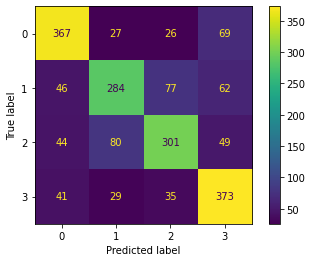

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_UNI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM

        # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional
        self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits

'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)


            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('LSTM-UNI',iter,'RAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#BI - Directional

Adam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.2873015403747559. Accuracy: 49.58115% F1-macro: 48.32% F1-weighted: 48.41% cohen_kappa: 0.33%
Iteration: 2000. Loss: 1.3386818170547485. Accuracy: 54.86911% F1-macro: 54.73% F1-weighted: 54.78% cohen_kappa: 0.40%
Iteration: 3000. Loss: 1.082663655281067. Accuracy: 56.02094% F1-macro: 55.47% F1-weighted: 55.50% cohen_kappa: 0.41%
Iteration: 4000. Loss: 1.0331249237060547. Accuracy: 59.16230% F1-macro: 58.87% F1-weighted: 58.91% cohen_kappa: 0.46%
Iteration: 5000. Loss: 0.9583522081375122. Accuracy: 61.25654% F1-macro: 61.50% F1-weighted: 61.53% cohen_kappa: 0.48%
Iteration: 6000. Loss: 1.1712086200714111. Accuracy: 65.44503% F1-macro: 65.20% F1-weighted: 65.27% cohen_kappa: 0.54%
Iteration: 7000. Loss: 0.9718624949455261. Accuracy: 65.07853% F1-macro: 65.05% F1-weighted: 65.09% cohen_kappa: 0.53%
Iteration: 8000. Loss: 0.8799309730529785. Accuracy: 67.80105% F1-macro: 67.64% F1-weighted: 67.69% cohen_kappa: 0.57%
Iteration: 9000. Loss: 

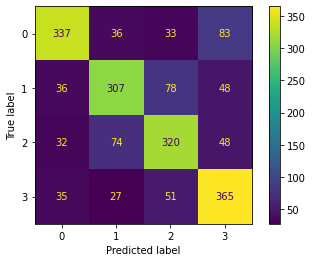

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                        batch_size=batch_size,
                                        shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                        batch_size=batch_size,
                                        shuffle=False,drop_last=True)



class LSTM_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(LSTM_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.dropout = nn.Dropout(.1)
      self.softmax = nn.Softmax(dim=1)


  def forward(self, x):
      # set initial hidden and cell states
      # print('x size:',x.size(0))
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
      c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional


      #Forward Propagation
      out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits


'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):

      # print('before:',images.shape)

      images = images.reshape(batch_size, sequence_length, input_size).to(device)

      # print('after:',images.shape)

      labels = labels.to(device)

      # Clear gradients w.r.t. parameters
      optimizer.zero_grad()

      # Forward pass to get output/logits
      outputs = model(images.float())


      # Calculate Loss: softmax --> cross entropy loss
      loss = criterion(outputs, labels)

      # Getting gradients w.r.t. parameters
      loss.backward()

      # Updating parameters
      optimizer.step()

      iter += 1
      if iter % check_acc_iter == 0:
          # Calculate Accuracy
          correct = 0
          total = 0
          y_pred = []
          y_true = []
          # Iterate through test dataset
          for i_model, (images, labels) in enumerate(test_loader):

              images = images.reshape(batch_size, sequence_length, input_size).to(device)

              # Forward pass only to get logits/output
              outputs = model(images.float())

              np_output = outputs.detach().cpu().numpy()

              if i_model == 0:
                  predictions = np_output
              else:
                  predictions = np.vstack((predictions, np_output))

              # Get predictions from the maximum value
              _, predicted = torch.max(outputs, 1)

              # Total number of labels
              total += labels.size(0)

              y_pred.extend(predicted.tolist())
              y_true.extend(labels.tolist())

              # Total correct predictions
              if torch.cuda.is_available():
                  correct += (predicted.cpu() == labels.cpu()).sum()
              else:
                  correct += (predicted == labels).sum()

          accuracy = 100 * correct.item() / total

          f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
          f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
          cohen_kappa = cohen_kappa_score(y_true, y_pred)


          # Print Loss
          print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
          plt_data_balanced.append(('LSTM-BI',iter,'Adam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.1286790370941162. Accuracy: 50.83770% F1-macro: 50.46% F1-weighted: 50.55% cohen_kappa: 0.34%
Iteration: 2000. Loss: 1.3221909999847412. Accuracy: 53.14136% F1-macro: 52.98% F1-weighted: 53.02% cohen_kappa: 0.38%
Iteration: 3000. Loss: 1.2006396055221558. Accuracy: 57.59162% F1-macro: 57.69% F1-weighted: 57.75% cohen_kappa: 0.43%
Iteration: 4000. Loss: 0.814818263053894. Accuracy: 58.16754% F1-macro: 56.57% F1-weighted: 56.69% cohen_kappa: 0.44%
Iteration: 5000. Loss: 0.9325127601623535. Accuracy: 61.98953% F1-macro: 61.71% F1-weighted: 61.77% cohen_kappa: 0.49%
Iteration: 6000. Loss: 1.1977617740631104. Accuracy: 61.83246% F1-macro: 60.97% F1-weighted: 61.03% cohen_kappa: 0.49%
Iteration: 7000. Loss: 0.9443302154541016. Accuracy: 63.82199% F1-macro: 63.00% F1-weighted: 63.07% cohen_kappa: 0.52%
Iteration: 8000. Loss: 1.140569806098938. Accuracy: 68.74346% F1-macro: 68.57% F1-weighted: 68.62% cohen_kappa: 0.58%
Iteration: 9000. Loss: 0

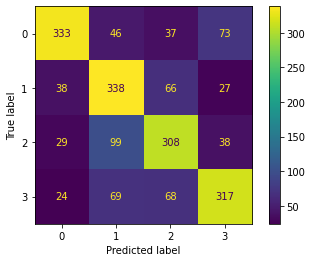

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)



class LSTM_BI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_BI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
        # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

        self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits


'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('LSTM-BI',iter,'NAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 9592 768
Iteration: 1000. Loss: 1.2248424291610718. Accuracy: 48.06283% F1-macro: 46.20% F1-weighted: 46.34% cohen_kappa: 0.31%
Iteration: 2000. Loss: 1.4428380727767944. Accuracy: 53.03665% F1-macro: 52.95% F1-weighted: 53.01% cohen_kappa: 0.37%
Iteration: 3000. Loss: 0.9833515882492065. Accuracy: 54.97382% F1-macro: 54.68% F1-weighted: 54.76% cohen_kappa: 0.40%
Iteration: 4000. Loss: 1.1333812475204468. Accuracy: 57.17277% F1-macro: 57.06% F1-weighted: 57.13% cohen_kappa: 0.43%
Iteration: 5000. Loss: 1.0974175930023193. Accuracy: 60.52356% F1-macro: 60.33% F1-weighted: 60.41% cohen_kappa: 0.47%
Iteration: 6000. Loss: 1.1773301362991333. Accuracy: 60.99476% F1-macro: 60.83% F1-weighted: 60.90% cohen_kappa: 0.48%
Iteration: 7000. Loss: 0.9892158508300781. Accuracy: 63.56021% F1-macro: 63.22% F1-weighted: 63.32% cohen_kappa: 0.51%
Iteration: 8000. Loss: 1.0826964378356934. Accuracy: 66.80628% F1-macro: 66.93% F1-weighted: 66.99% cohen_kappa: 0.56%
Iteration: 9000. Loss:

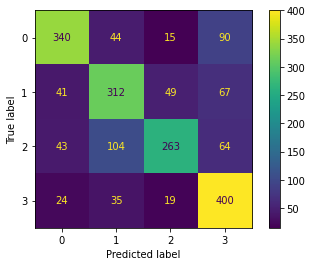

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_BI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_BI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
        # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

        self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits


'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_balanced.append(('LSTM-BI',iter,'RAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#Imbalanced Dataset

#UNI - Directional

Adam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.3145396709442139. Accuracy: 53.22884% F1-macro: 31.65% F1-weighted: 44.53% cohen_kappa: 0.24%
Iteration: 2000. Loss: 1.108544111251831. Accuracy: 58.65204% F1-macro: 42.73% F1-weighted: 53.20% cohen_kappa: 0.31%
Iteration: 3000. Loss: 0.9819558262825012. Accuracy: 60.34483% F1-macro: 46.31% F1-weighted: 56.16% cohen_kappa: 0.35%
Iteration: 4000. Loss: 1.1243447065353394. Accuracy: 61.19122% F1-macro: 46.53% F1-weighted: 56.18% cohen_kappa: 0.35%
Iteration: 5000. Loss: 1.0418570041656494. Accuracy: 62.91536% F1-macro: 54.19% F1-weighted: 61.71% cohen_kappa: 0.43%
Iteration: 6000. Loss: 0.9803433418273926. Accuracy: 64.29467% F1-macro: 55.39% F1-weighted: 62.79% cohen_kappa: 0.45%
Iteration: 7000. Loss: 1.1557663679122925. Accuracy: 65.76803% F1-macro: 55.33% F1-weighted: 62.71% cohen_kappa: 0.44%
Iteration: 8000. Loss: 1.2614158391952515. Accuracy: 66.80251% F1-macro: 57.73% F1-weighted: 64.73% cohen_kappa: 0.47%
Uncertainity: 1.064961

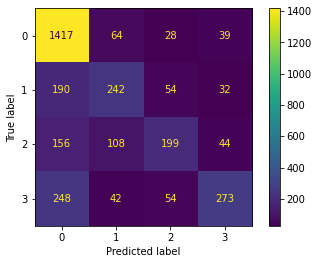

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_UNI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM

        # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional
        self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits

'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))


                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('LSTM-UNI',iter,'Adam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.0195130109786987. Accuracy: 57.21003% F1-macro: 37.43% F1-weighted: 49.13% cohen_kappa: 0.28%
Iteration: 2000. Loss: 1.2999578714370728. Accuracy: 59.62382% F1-macro: 45.89% F1-weighted: 55.68% cohen_kappa: 0.34%
Iteration: 3000. Loss: 1.3553537130355835. Accuracy: 61.72414% F1-macro: 50.36% F1-weighted: 59.46% cohen_kappa: 0.40%
Iteration: 4000. Loss: 1.1145529747009277. Accuracy: 60.40752% F1-macro: 45.92% F1-weighted: 55.63% cohen_kappa: 0.34%
Iteration: 5000. Loss: 1.0480390787124634. Accuracy: 61.12853% F1-macro: 51.30% F1-weighted: 59.02% cohen_kappa: 0.40%
Iteration: 6000. Loss: 0.7736427783966064. Accuracy: 64.54545% F1-macro: 54.65% F1-weighted: 62.63% cohen_kappa: 0.45%
Iteration: 7000. Loss: 1.0137155055999756. Accuracy: 66.23824% F1-macro: 56.58% F1-weighted: 64.09% cohen_kappa: 0.47%
Iteration: 8000. Loss: 1.088423728942871. Accuracy: 66.67712% F1-macro: 57.82% F1-weighted: 64.95% cohen_kappa: 0.48%
Uncertainity: 1.121334

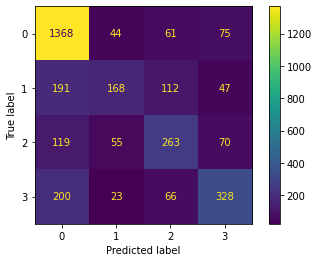

In [ ]:
dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_UNI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM

        # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional
        self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits

'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))


                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total
            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('LSTM-UNI',iter,'NAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.2808442115783691. Accuracy: 53.19749% F1-macro: 28.18% F1-weighted: 41.58% cohen_kappa: 0.21%
Iteration: 2000. Loss: 1.1966297626495361. Accuracy: 55.98746% F1-macro: 33.28% F1-weighted: 45.92% cohen_kappa: 0.25%
Iteration: 3000. Loss: 1.0700054168701172. Accuracy: 59.21630% F1-macro: 48.17% F1-weighted: 57.39% cohen_kappa: 0.38%
Iteration: 4000. Loss: 1.2477774620056152. Accuracy: 60.09404% F1-macro: 44.50% F1-weighted: 55.26% cohen_kappa: 0.35%
Iteration: 5000. Loss: 1.2425647974014282. Accuracy: 61.15987% F1-macro: 48.43% F1-weighted: 57.55% cohen_kappa: 0.39%
Iteration: 6000. Loss: 0.9502446055412292. Accuracy: 62.94671% F1-macro: 51.99% F1-weighted: 60.34% cohen_kappa: 0.42%
Iteration: 7000. Loss: 1.4284749031066895. Accuracy: 64.32602% F1-macro: 53.62% F1-weighted: 61.80% cohen_kappa: 0.43%
Iteration: 8000. Loss: 0.8510286211967468. Accuracy: 66.48903% F1-macro: 56.05% F1-weighted: 63.65% cohen_kappa: 0.46%
Uncertainity: 1.03047

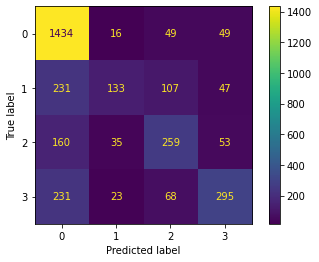

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)


class LSTM_UNI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_UNI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) # For uni Directional LSTM

        # self.fc = nn.Linear(hidden_size, num_classes) #For uni Directional
        self.fc_1 = nn.Linear(hidden_size, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits

'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_UNI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0

            y_pred = []
            y_true = []

            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))


                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total


            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('LSTM-UNI',iter,'RAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

#BI - Directional

Adam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.2257328033447266. Accuracy: 57.21003% F1-macro: 37.07% F1-weighted: 49.13% cohen_kappa: 0.29%
Iteration: 2000. Loss: 1.451139211654663. Accuracy: 59.34169% F1-macro: 47.54% F1-weighted: 56.76% cohen_kappa: 0.37%
Iteration: 3000. Loss: 1.2893260717391968. Accuracy: 60.31348% F1-macro: 44.55% F1-weighted: 54.76% cohen_kappa: 0.33%
Iteration: 4000. Loss: 1.1346981525421143. Accuracy: 62.75862% F1-macro: 50.07% F1-weighted: 58.88% cohen_kappa: 0.39%
Iteration: 5000. Loss: 0.9404693841934204. Accuracy: 64.73354% F1-macro: 55.47% F1-weighted: 62.95% cohen_kappa: 0.45%
Iteration: 6000. Loss: 1.2412649393081665. Accuracy: 65.45455% F1-macro: 54.41% F1-weighted: 62.44% cohen_kappa: 0.44%
Iteration: 7000. Loss: 1.2436230182647705. Accuracy: 66.83386% F1-macro: 56.25% F1-weighted: 63.88% cohen_kappa: 0.47%
Iteration: 8000. Loss: 0.9511474370956421. Accuracy: 66.83386% F1-macro: 57.03% F1-weighted: 64.37% cohen_kappa: 0.48%
Uncertainity: 1.059361

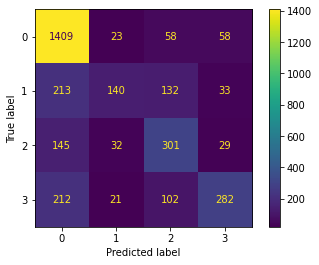

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                        batch_size=batch_size,
                                        shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                        batch_size=batch_size,
                                        shuffle=False,drop_last=True)



class LSTM_BI(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(LSTM_BI, self).__init__()
      self.hidden_size= hidden_size
      self.num_layers = num_layers

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
      # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

      self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
      self.fc_2 = nn.Linear(512, 128) #For uni Directional
      self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


      self.relu = nn.ReLU()
      self.dropout = nn.Dropout(.1)
      self.softmax = nn.Softmax(dim=1)


  def forward(self, x):
      # set initial hidden and cell states
      # print('x size:',x.size(0))
      h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
      c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional


      #Forward Propagation
      out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

      # Decode the hidden state of the last time step
      # out = self.fc(out[:, -1, :])

      out = self.fc_1(out[:, -1, :])
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_2(out)
      out = self.dropout(out)
      out = self.relu(out)

      out = self.fc_3(out)

      logits = self.softmax(out)
      return logits


'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0

predictions = []

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):

      # print('before:',images.shape)

      images = images.reshape(batch_size, sequence_length, input_size).to(device)

      # print('after:',images.shape)

      labels = labels.to(device)

      # Clear gradients w.r.t. parameters
      optimizer.zero_grad()

      # Forward pass to get output/logits
      outputs = model(images.float())


      # Calculate Loss: softmax --> cross entropy loss
      loss = criterion(outputs, labels)

      # Getting gradients w.r.t. parameters
      loss.backward()

      # Updating parameters
      optimizer.step()

      iter += 1
      if iter % check_acc_iter == 0:
          # Calculate Accuracy
          correct = 0
          total = 0
          y_pred = []
          y_true = []

          # Iterate through test dataset
          for i_model, (images, labels) in enumerate(test_loader):

              images = images.reshape(batch_size, sequence_length, input_size).to(device)

              # Forward pass only to get logits/output
              outputs = model(images.float())

              np_output = outputs.detach().cpu().numpy()

              if i_model == 0:
                  predictions = np_output
              else:
                  predictions = np.vstack((predictions, np_output))


              # Get predictions from the maximum value
              _, predicted = torch.max(outputs, 1)

              # Total number of labels
              total += labels.size(0)

              y_pred.extend(predicted.tolist())
              y_true.extend(labels.tolist())


              # Total correct predictions
              if torch.cuda.is_available():
                  correct += (predicted.cpu() == labels.cpu()).sum()
              else:
                  correct += (predicted == labels).sum()

          accuracy = 100 * correct.item() / total

          f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
          f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
          cohen_kappa = cohen_kappa_score(y_true, y_pred)

          # Print Loss
          print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
          plt_data_imbalanced.append(('LSTM-BI',iter,'Adam',loss.item()))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

NAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.0770573616027832. Accuracy: 55.92476% F1-macro: 36.70% F1-weighted: 48.13% cohen_kappa: 0.23%
Iteration: 2000. Loss: 0.9997225999832153. Accuracy: 58.52665% F1-macro: 41.61% F1-weighted: 52.78% cohen_kappa: 0.32%
Iteration: 3000. Loss: 0.9241530299186707. Accuracy: 57.64890% F1-macro: 46.71% F1-weighted: 55.86% cohen_kappa: 0.35%
Iteration: 4000. Loss: 0.8863587379455566. Accuracy: 62.13166% F1-macro: 46.90% F1-weighted: 56.66% cohen_kappa: 0.38%
Iteration: 5000. Loss: 1.1052839756011963. Accuracy: 64.42006% F1-macro: 53.38% F1-weighted: 61.27% cohen_kappa: 0.42%
Iteration: 6000. Loss: 1.0845608711242676. Accuracy: 65.83072% F1-macro: 56.25% F1-weighted: 63.41% cohen_kappa: 0.46%
Iteration: 7000. Loss: 1.1999409198760986. Accuracy: 67.33542% F1-macro: 58.11% F1-weighted: 65.03% cohen_kappa: 0.48%
Iteration: 8000. Loss: 0.8919231295585632. Accuracy: 67.46082% F1-macro: 59.22% F1-weighted: 65.82% cohen_kappa: 0.49%
Uncertainity: 1.11034

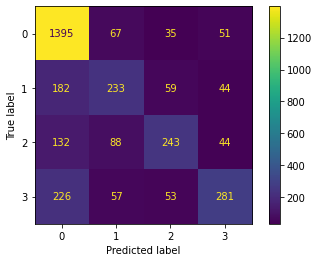

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)



class LSTM_BI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_BI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
        # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

        self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits


'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0

            y_pred = []
            y_true = []
            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))


                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('LSTM-BI',iter,'NAdam',loss.item()))


uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

RAdam

dataset_b.shape: 15988 768
Iteration: 1000. Loss: 1.2542946338653564. Accuracy: 53.10345% F1-macro: 29.63% F1-weighted: 42.63% cohen_kappa: 0.20%
Iteration: 2000. Loss: 1.3001810312271118. Accuracy: 56.67712% F1-macro: 36.12% F1-weighted: 47.93% cohen_kappa: 0.26%
Iteration: 3000. Loss: 1.0939438343048096. Accuracy: 60.56426% F1-macro: 47.60% F1-weighted: 57.08% cohen_kappa: 0.37%
Iteration: 4000. Loss: 0.9670200347900391. Accuracy: 62.57053% F1-macro: 50.62% F1-weighted: 59.04% cohen_kappa: 0.39%
Iteration: 5000. Loss: 1.3421238660812378. Accuracy: 63.26019% F1-macro: 51.49% F1-weighted: 59.71% cohen_kappa: 0.40%
Iteration: 6000. Loss: 1.2096383571624756. Accuracy: 61.56740% F1-macro: 47.69% F1-weighted: 57.51% cohen_kappa: 0.41%
Iteration: 7000. Loss: 0.8442291021347046. Accuracy: 64.79624% F1-macro: 56.20% F1-weighted: 63.28% cohen_kappa: 0.45%
Iteration: 8000. Loss: 1.041264295578003. Accuracy: 67.39812% F1-macro: 59.34% F1-weighted: 66.04% cohen_kappa: 0.50%
Uncertainity: 1.143120

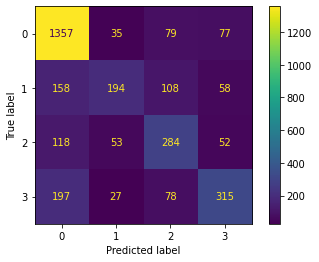

In [ ]:

dataset_b = pd.read_csv(embeddings_balanced_b_path_im)

dataset_b.drop(columns=['Unnamed: 0'],inplace=True)

dataset_b = dataset_b.to_numpy()
dataset_b.shape

data_X = dataset_b[:,:-1]
data_X = torch.from_numpy(data_X)
data_X.shape

data_Y = dataset_b[:,-1]
data_Y = torch.from_numpy(data_Y)
data_Y.shape


col = dataset_b.shape[1]-1

print('dataset_b.shape:',dataset_b.shape[0],col)

train_dataset = []
test_dataset = []
train_data, test_data = train_test_split(dataset_b,test_size= 0.2,random_state = 2)


sequence_length = 1
input_size = 768
hidden_size = 768
num_layers = 2
num_classes= 4
batch_size = 10
num_iters = 10000
learning_rate = 0.0001  # More power so we can learn faster! previously it was 0.001
check_acc_iter = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for x in train_data:
  train_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

for x in test_data:
  test_dataset.append((torch.from_numpy(x[:-1]),int(x[-1])))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,drop_last=True)   # It's better to shuffle the whole training dataset!

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,drop_last=True)



class LSTM_BI(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM_BI, self).__init__()
        self.hidden_size= hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,bidirectional=True) # For BiDirectional LSTM
        # self.fc = nn.Linear(hidden_size*2, num_classes) #For uni Directional

        self.fc_1 = nn.Linear(hidden_size*2, 512) #For uni Directional
        self.fc_2 = nn.Linear(512, 128) #For uni Directional
        self.fc_3 = nn.Linear(128, num_classes) #For uni Directional


        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(.1)
        self.softmax = nn.Softmax(dim=1)


    def forward(self, x):
        # set initial hidden and cell states
        # print('x size:',x.size(0))
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device) #For uni Directional


        #Forward Propagation
        out, _  = self.lstm(x,(h0,c0)) #out: tensor of shape (batch size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        # out = self.fc(out[:, -1, :])

        out = self.fc_1(out[:, -1, :])
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_2(out)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.fc_3(out)

        logits = self.softmax(out)
        return logits


'''
INSTANTIATE MODEL CLASS
'''
model = LSTM_BI( input_size, hidden_size, num_layers, num_classes)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RAdam(model.parameters(), lr=learning_rate)

num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
# print(num_epochs)


'''
TRAIN THE MODEL
'''
iter = 0
mx_acc = 0
y_score_pos = []
y_score_neg = []
predictions = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # print('before:',images.shape)

        images = images.reshape(batch_size, sequence_length, input_size).to(device)

        # print('after:',images.shape)

        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images.float())


        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1
        if iter % check_acc_iter == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            y_pred = []
            y_true = []

            # Iterate through test dataset
            for i_model, (images, labels) in enumerate(test_loader):

                images = images.reshape(batch_size, sequence_length, input_size).to(device)

                # Forward pass only to get logits/output
                outputs = model(images.float())

                np_output = outputs.detach().cpu().numpy()

                if i_model == 0:
                    predictions = np_output
                else:
                    predictions = np.vstack((predictions, np_output))

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)

                y_pred.extend(predicted.tolist())
                y_true.extend(labels.tolist())


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            f1_macro = f1_score(y_true,y_pred,zero_division='warn',average='macro') * 100
            f1_weighted = f1_score(y_true,y_pred,zero_division='warn',average='weighted') * 100
            cohen_kappa = cohen_kappa_score(y_true, y_pred)

            if mx_acc < accuracy:
              mx_acc = accuracy

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {:.5f}% F1-macro: {:.2f}% F1-weighted: {:.2f}% cohen_kappa: {:.2f}%'.format(iter, loss.item(), accuracy,f1_macro,f1_weighted,cohen_kappa))
            plt_data_imbalanced.append(('LSTM-BI',iter,'RAdam',loss.item()))

uncertainity = predictive_entropy(predictions)
print("Uncertainity:", uncertainity)

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

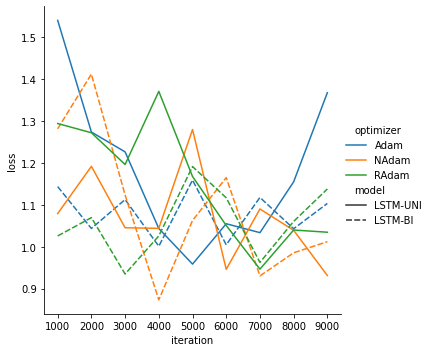

In [ ]:
plt_df = pd.DataFrame.from_records(
    plt_data_balanced, columns=['model','iteration','optimizer','loss'])
sns.relplot(x="iteration", y="loss",
            hue="optimizer", style="model",
            kind="line", data=plt_df)

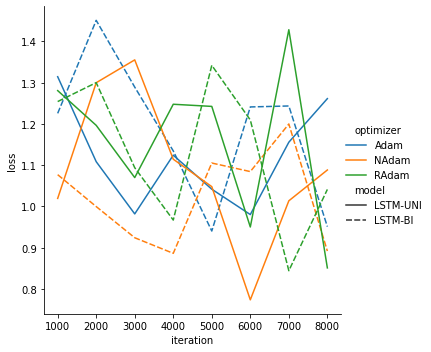

In [ ]:
plt_df = pd.DataFrame.from_records(
    plt_data_imbalanced, columns=['model','iteration','optimizer','loss'])
sns.relplot(x="iteration", y="loss",
            hue="optimizer", style="model",
            kind="line", data=plt_df)

In [ ]:
import datetime
ct = datetime.datetime.now()
print("current time:-", ct)

current time:- 2023-03-06 08:37:04.310716


In [ ]:
# plot ROC for blanaced dataset
# plt.figure()
# lw = 2

# colors = ['red','green','blue']

# for i in range(3):
#   plt.plot(
#       plt_ROC_balanced[i][0],
#       plt_ROC_balanced[i][1],
#       color=colors[i],
#       lw=lw,
#       linestyle="dotted",
#       label="ROC for Model - %d (area = %0.2f)" % (i+1, 1 - plt_ROC_balanced[i][2]))

# for i in range(3,6):
#   plt.plot(
#       plt_ROC_balanced[i][0],
#       plt_ROC_balanced[i][1],
#       color=colors[i-3],
#       lw=lw,
#       linestyle="dashdot",
#       label="ROC for Model - %d (area = %0.2f)" % (i+1,1 - plt_ROC_balanced[i][2]))

# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Receiver operating characteristic")
# plt.legend(loc="best")
# plt.show()

In [ ]:
# plot ROC for imblanaced dataset

# plt.figure()
# lw = 2
# colors = ['red','green','blue']

# for i in range(3):
#   plt.plot(
#       plt_ROC_imbalanced[i][0],
#       plt_ROC_imbalanced[i][1],
#       color=colors[i],
#       lw=lw,
#       linestyle="dotted",
#       label="ROC for Model - %d (area = %0.2f)" % (i+1,1 - plt_ROC_imbalanced[i][2]))

# for i in range(3,6):
#   plt.plot(
#       plt_ROC_imbalanced[i][0],
#       plt_ROC_imbalanced[i][1],
#       color=colors[i-3],
#       lw=lw,
#       linestyle="dashdot",
#       label="ROC for Model - %d (area = %0.2f)" % (i+1,1 - plt_ROC_imbalanced[i][2]))

# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Receiver operating characteristic")
# plt.legend(loc="best")
# plt.show()